# Ford GoBike Bike Sharing Data Exploration

## by Kai-Sheng Wang

## Preliminary Wrangling

This document explores a dataset which contains user information, time and other attributes for more than 2 million bike sharing rides from May 2018 to April 2019.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
import warnings

%matplotlib inline

- Import packages and set plot to be embedded inline

In [2]:
df_201805 = pd.read_csv('trip_data_files/201805-fordgobike-tripdata.csv')
df_201806 = pd.read_csv('trip_data_files/201806-fordgobike-tripdata.csv')
df_201807 = pd.read_csv('trip_data_files/201807-fordgobike-tripdata.csv')
df_201808 = pd.read_csv('trip_data_files/201808-fordgobike-tripdata.csv')
df_201809 = pd.read_csv('trip_data_files/201809-fordgobike-tripdata.csv')
df_201810 = pd.read_csv('trip_data_files/201810-fordgobike-tripdata.csv')
df_201811 = pd.read_csv('trip_data_files/201811-fordgobike-tripdata.csv')
df_201812 = pd.read_csv('trip_data_files/201812-fordgobike-tripdata.csv')
df_201901 = pd.read_csv('trip_data_files/201901-fordgobike-tripdata.csv')
df_201902 = pd.read_csv('trip_data_files/201902-fordgobike-tripdata.csv')
df_201903 = pd.read_csv('trip_data_files/201903-fordgobike-tripdata.csv')
df_201904 = pd.read_csv('trip_data_files/201904-fordgobike-tripdata.csv')

In [3]:
frames = [df_201805, df_201806, df_201807, df_201808, 
          df_201809, df_201810, df_201811, df_201812, 
          df_201901, df_201902, df_201903, df_201904]

df = pd.concat(frames, ignore_index=True)

- Load the files and merge the datasets into a dataframe

### Clean Data ###

In [4]:
df_clean = df.copy()

In [5]:
df_clean.shape

(2290554, 16)

In [6]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
241168,459,2018-06-21 18:22:26.5030,2018-06-21 18:30:06.2550,37.0,2nd St at Folsom St,37.785000,-122.395936,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3369,Subscriber,1981.0,Male,No
1810135,2108,2019-03-29 18:49:58.9830,2019-03-29 19:25:07.9800,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2890,Subscriber,1962.0,Female,No
250028,562,2018-06-20 16:48:48.6490,2018-06-20 16:58:11.2440,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,125.0,20th St at Bryant St,37.759200,-122.409851,1876,Subscriber,1981.0,Female,No
663694,475,2018-08-17 08:37:07.0460,2018-08-17 08:45:02.3120,98.0,Valencia St at 16th St,37.765052,-122.421866,350.0,8th St at Brannan St,37.771431,-122.405787,3650,Subscriber,1986.0,Female,No
657692,420,2018-08-18 09:03:51.0140,2018-08-18 09:10:51.2730,279.0,Santa Clara St at 7th St,37.339146,-121.884105,317.0,San Salvador St at 9th St,37.333955,-121.877349,2547,Subscriber,1993.0,Female,Yes


- Create a copy for data cleaning
- Check the dataset and name and value of the columns

#### Missing Values ####

In [7]:
df_clean.duplicated().sum()

0

- No duplicated entries found

In [8]:
df_clean.start_station_id.isnull().sum()

12501

In [9]:
df_clean[df_clean.start_station_id.isnull()].sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
376449,740,2018-07-31 18:32:13.6390,2018-07-31 18:44:33.8530,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4128,Subscriber,1991.0,Male,No
1407807,757,2018-12-04 08:03:12.4840,2018-12-04 08:15:50.4450,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.93,4121,Customer,1969.0,Male,No
712907,195,2018-08-09 11:56:29.9610,2018-08-09 11:59:44.9810,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.96,4077,Customer,1962.0,Male,No
1180901,454,2018-11-25 13:21:10.4550,2018-11-25 13:28:45.1550,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.94,4081,Customer,1993.0,Male,No
1069064,311,2018-10-13 15:38:24.5690,2018-10-13 15:43:36.2290,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.94,4289,Customer,1984.0,Male,No


In [10]:
df_clean[df_clean.start_station_id.isnull()].start_station_latitude.unique()

array([ 37.4 ,  37.41,  37.42,  37.37,  37.39,  37.38,  37.43,  45.51,
        37.34,  37.33,  37.35,  44.95,  37.36,  40.66,  37.45,  37.32,
        45.5 ,  37.44])

In [11]:
df_clean[df_clean.start_station_id.isnull()].start_station_longitude.unique()

array([-121.94, -121.96, -121.93, -121.92, -121.95, -121.97,  -73.57,
       -121.89, -121.91, -121.98,  -93.22, -121.9 ,  -74.01, -121.84,
       -121.86, -121.88, -121.99, -121.87, -121.83])

In [12]:
df_clean = df_clean[pd.notnull(df_clean['start_station_id'])]

- 12,501 entries with null value in 'start_station_id'
- Of the 12,501 entries with null value in 'start_station_id', the number of latitudes and longitudes   seems to be too low for combination of coodinates and the values too identical
- As travel distance is a key variable to the analysis, the rows without information about start and end locations are removed

In [13]:
df_clean.member_birth_year.isnull().sum()

116947

In [14]:
df_clean.member_gender.isnull().sum()

116741

In [15]:
df_clean = df_clean[pd.notnull(df_clean['member_birth_year'])]
df_clean = df_clean[pd.notnull(df_clean['member_gender'])]

- Entries with null value in 'member_birth_year' and 'member_gender' both account for about 5% of the entire data
- Although 5% is substantial, rows with null value in these two columns are removed as gender and age are both key variables to the analysis

#### Convert data type ####

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161106 entries, 1 to 2290553
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 280.3+ MB


In [17]:
df_clean['start_time'] = pd.to_datetime(df['start_time'])
df_clean['end_time'] = pd.to_datetime(df['end_time'])

- Convert two time-relevant variables 'start_time' and 'end_time' to datetime data type

### What is the structure of your dataset?

The original datasets contain the information about 2,290,554 bike rides with 16 columns. There are 2,161,106 rides left after initial data cleaning. 2 time-relevant variables ('start_time', 'end_time') are converted to datetime data type. The latitude and longitude coordinates of both start and end locations are provided. One numeric variable ('member_birth_year') and two categorical variables ('user_type', 'member_gender') about the users are also available.

### What is/are the main feature(s) of interest in your dataset?

I'm interested in finding out how the bike sharing service is used, especially if any pattern exists, and whether a user's gender, age and user type determine how he or she uses the service.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I suppose time variables will play an essential role in how the service is used. Specifically, month of year (seasons), day of week and hour of day need to be created as a new variable to examine user behavior more closely. Additionally, user's profile should also be a strong predictor.

## Univariate Exploration

In [18]:
base_color = sb.color_palette()[0]
alt_color = sb.color_palette()[1]

In [19]:
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

- A new variable 'member_age' (user's age) created

In [20]:
df_clean['member_age'].describe().apply(lambda x: format(x, 'f'))

count    2161106.000000
mean          35.035114
std           10.252398
min           18.000000
25%           28.000000
50%           33.000000
75%           40.000000
max          141.000000
Name: member_age, dtype: object

In [21]:
df_clean = df_clean.query('member_age <= 100')

- Maximum value of age is 141, which is very unlikely. Entries with users more than 100 years of age removed

In [22]:
df_clean['member_age'].describe().apply(lambda x: format(x, 'f'))

count    2160036.000000
mean          34.994026
std           10.086741
min           18.000000
25%           28.000000
50%           33.000000
75%           40.000000
max           99.000000
Name: member_age, dtype: object

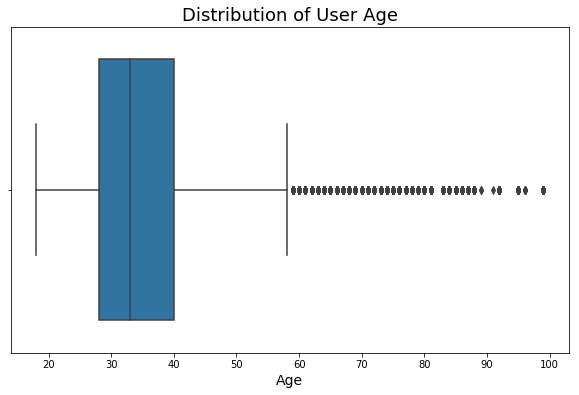

In [23]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_clean, x='member_age', color=base_color)
plt.title("Distribution of User Age", fontsize=18)
plt.xlabel("Age", fontsize=14);

- The service users are mostly between 28 to 40 years of age

In [24]:
df_clean['member_age_group'] = df_clean['member_age'].apply(lambda x: '18-19' if 18<=x<20
                                                            else '20-29' if 20<=x<30
                                                            else '30-39' if 30<=x<40
                                                            else '40-49' if 40<=x<50
                                                            else '50-59' if 50<=x<60
                                                            else '60 or over')

- A new variable 'member_age_group' (users divided into six age groups) created

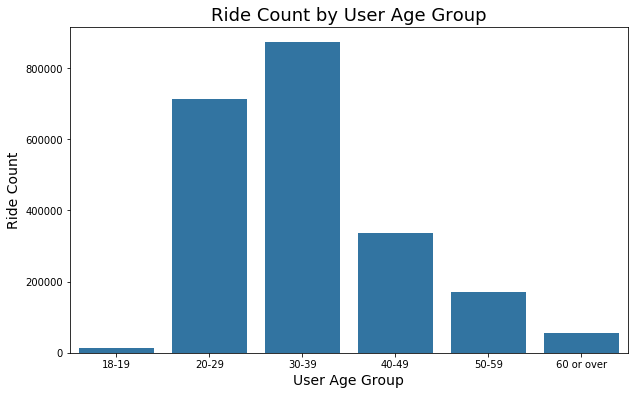

In [25]:
groups = ['18-19', '20-29', '30-39', '40-49', '50-59', '60 or over']
plt.figure(figsize=(10, 6))
sb.countplot(data=df_clean, x='member_age_group', color=base_color, order=groups)
plt.title("Ride Count by User Age Group", fontsize=18)
plt.xlabel("User Age Group", fontsize=14)
plt.ylabel("Ride Count", fontsize=14);

- '30-39' is the largest user group, followed by '20-29' and '40-49'

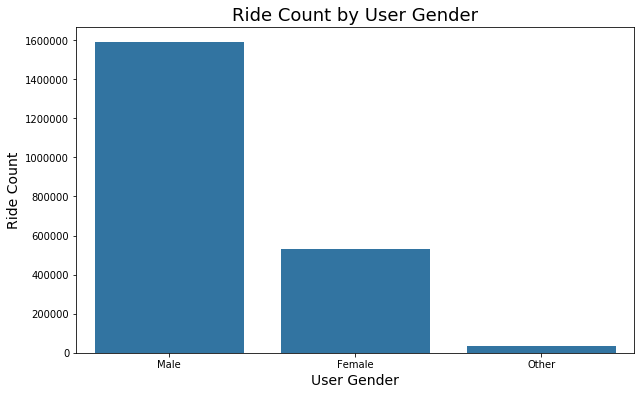

In [26]:
plt.figure(figsize=(10, 6))
sb.countplot(data=df_clean, x='member_gender', color=base_color)
plt.title("Ride Count by User Gender", fontsize=18)
plt.xlabel("User Gender", fontsize=14)
plt.ylabel("Ride Count", fontsize=14);

- The ride count by male user group is more than two times larger than the female user group

In [27]:
df_clean['start_time_year_month'] = df_clean['start_time'].map(lambda x: x.strftime('%Y-%m'))
df_clean['end_time_year_month'] = df_clean['end_time'].map(lambda x: x.strftime('%Y-%m'))

- Two new variables 'start_time_year_month', 'end_time_year_month' (time variables in 'yyyy-mm' format) created 

In [28]:
df_count_month = df_clean.groupby(['start_time_year_month']).size().reset_index()

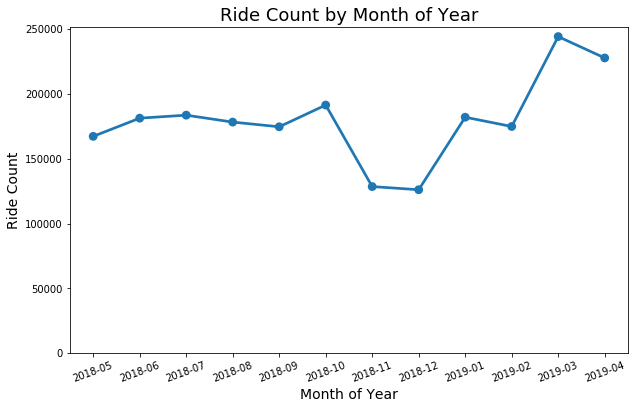

In [29]:
plt.figure(figsize=(10, 6))
ax = sb.pointplot(data=df_count_month, x='start_time_year_month', y=0)
plt.title('Ride Count by Month of Year', fontsize=18)
plt.xlabel('Month of Year', fontsize=14)
plt.ylabel('Ride Count', fontsize=14)
plt.ylim(0,)
plt.xticks(rotation=20);

- Significant decline of use in cold months (November and December, 2018)
- There is a big jump of ride count in March 2019. The count drops slightly in the following month, but still fairly higher than the counts in 2018

In [30]:
df_clean['duration_min'] = df_clean['duration_sec']/60

- A new variable 'duration_min' (duration of ride in minutes) created

In [31]:
df_clean['duration_min'].describe().apply(lambda x: format(x, 'f'))

count    2160036.000000
mean          12.793658
std           30.998642
min            1.016667
25%            5.666667
50%            9.000000
75%           14.016667
max         1438.016667
Name: duration_min, dtype: object

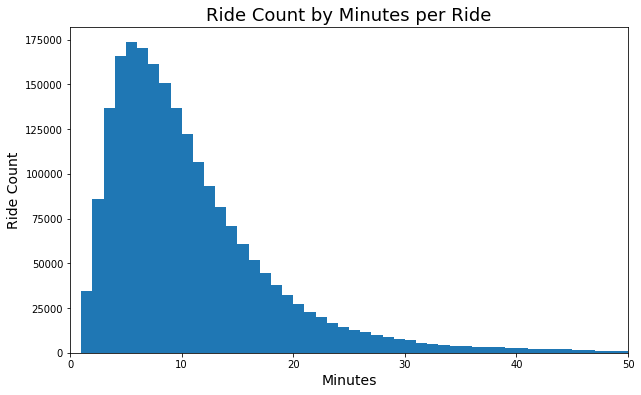

In [32]:
plt.figure(figsize=(10, 6))
bin_edges = np.arange(0, df_clean['duration_min'].max()+1, 1)
plt.hist(data=df_clean, x='duration_min', color=base_color, bins=bin_edges)
plt.xlim(0, 50)
plt.title("Ride Count by Minutes per Ride", fontsize=18)
plt.xlabel("Minutes", fontsize=14)
plt.ylabel("Ride Count", fontsize=14);

- 75% of the rides takes less than 15 minutes
- Most rides take around 5 minutes

In [33]:
def coordinates_distance(start, end):
    lat1, lon1 = start
    lat2, lon2 = end
    radius = 6371
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat/2)*math.sin(dlat/2)+math.cos(math.radians(lat1))*math.cos(math.radians(lat2))*math.sin(dlon/2)*math.sin(dlon/2))
    c = 2*math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    
    return d

In [34]:
df_clean['distance'] = df_clean.apply(lambda x: coordinates_distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

- A new variable 'distance' (distance between start and end coordinates in kilometer) created
- Source: https://stackoverflow.com/questions/33029396/using-pandas-to-calculate-distance-between-coordinates-from-imported-csv

In [35]:
df_clean['distance'].describe().apply(lambda x: format(x, 'f'))

count    2160036.000000
mean           1.756792
std           37.957869
min            0.000000
25%            0.885573
50%            1.405521
75%            2.159999
max        12798.346860
Name: distance, dtype: object

In [36]:
df_clean[df_clean['distance'] > 50].shape

(21, 22)

In [37]:
df_clean = df_clean[df_clean['distance'] <= 50]

- 21 entries with travel distance more than 50 kilometer are found
- As the number of entries is relative small and such travel distance is not of the interest of this analysis, these entries are removed

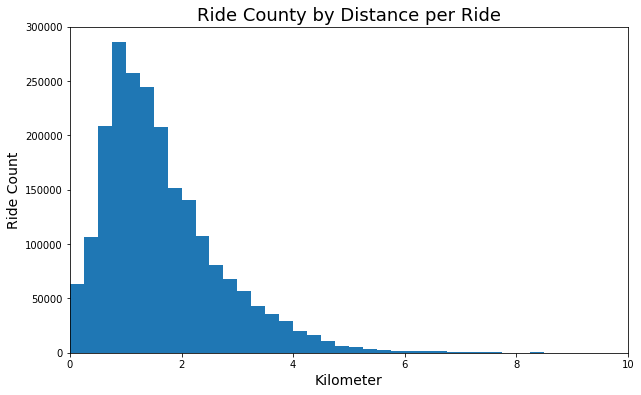

In [38]:
plt.figure(figsize=(10, 6))
bin_edges = np.arange(0, df_clean['distance'].max()+0.25, 0.25)
plt.hist(data=df_clean, x='distance', color=base_color, bins=bin_edges)
plt.xlim(0, 10)
plt.title("Ride County by Distance per Ride", fontsize=18)
plt.xlabel("Kilometer", fontsize=14)
plt.ylabel("Ride Count", fontsize=14);

- More than 75% of the ride distance is less than 3 kilometer
- Most frequent ride distance is around 1 kilometer

In [39]:
df_clean['start_time_weekday'] = df_clean['start_time'].dt.weekday_name
df_clean['end_time_weekday'] = df_clean['end_time'].dt.weekday_name

- Two new variables 'start_time_weekday', 'end_time_weekday' (time variables in day of week format) created 

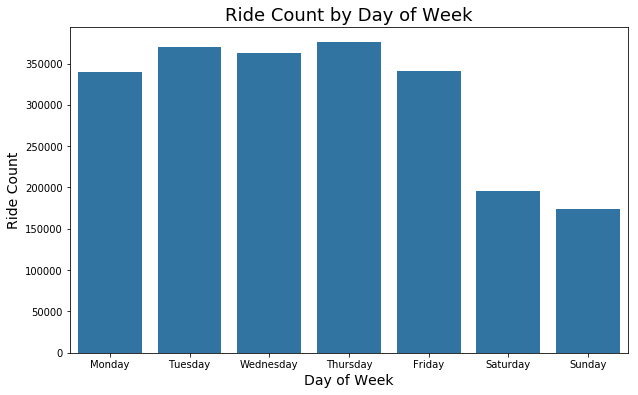

In [40]:
weekday_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sb.countplot(data=df_clean, x='start_time_weekday', color=base_color, order=weekday_index)
plt.title("Ride Count by Day of Week", fontsize=18)
plt.xlabel("Day of Week", fontsize=14)
plt.ylabel("Ride Count", fontsize=14);

- The highest demand for the service is on Tuesday and Thursday
- The service is used significantly less on weekends

In [41]:
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['end_time_hour'] = df_clean['end_time'].dt.hour

- Two new variables 'start_time_hour', 'end_time_hour' (time variables in hour of day format) created

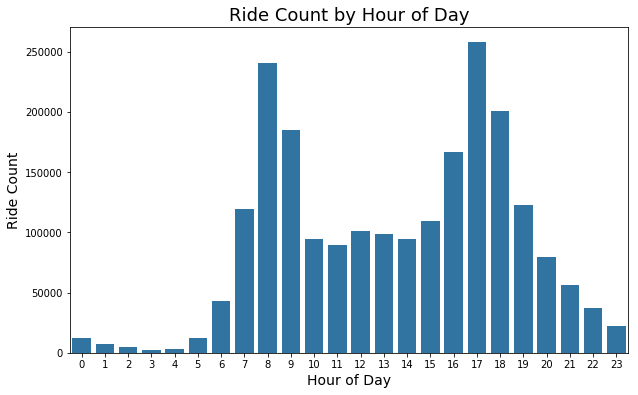

In [42]:
plt.figure(figsize=(10, 6))
sb.countplot(data=df_clean, x='start_time_hour', color=base_color)
plt.title("Ride Count by Hour of Day", fontsize=18)
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Ride Count", fontsize=14);

- There are two daily peak hours for the serivice: 8-9 a.m. and 4-6 p.m.

In [43]:
df_start_station = df_clean.groupby('start_station_name').size()
df_start_station.sort_values(ascending=False).head(10)

start_station_name
San Francisco Caltrain Station 2  (Townsend St at 4th St)    44685
Market St at 10th St                                         41392
San Francisco Ferry Building (Harry Bridges Plaza)           38241
Berry St at 4th St                                           37137
San Francisco Caltrain (Townsend St at 4th St)               36147
Montgomery St BART Station (Market St at 2nd St)             35812
Powell St BART Station (Market St at 4th St)                 34557
The Embarcadero at Sansome St                                31489
Steuart St at Market St                                      31140
Howard St at Beale St                                        29288
dtype: int64

In [44]:
df_end_station = df_clean.groupby('end_station_name').size()
df_end_station.sort_values(ascending=False).head(10)

end_station_name
San Francisco Caltrain Station 2  (Townsend St at 4th St)    60554
San Francisco Ferry Building (Harry Bridges Plaza)           44864
Market St at 10th St                                         41858
San Francisco Caltrain (Townsend St at 4th St)               41021
Montgomery St BART Station (Market St at 2nd St)             40980
Powell St BART Station (Market St at 4th St)                 36099
Berry St at 4th St                                           35904
The Embarcadero at Sansome St                                35622
Steuart St at Market St                                      31662
Powell St BART Station (Market St at 5th St)                 29060
dtype: int64

In [45]:
set(list(df_end_station.sort_values(ascending=False).head(10).index)).intersection(list(df_start_station.sort_values(ascending=False).head(10).index))

{'Berry St at 4th St',
 'Market St at 10th St',
 'Montgomery St BART Station (Market St at 2nd St)',
 'Powell St BART Station (Market St at 4th St)',
 'San Francisco Caltrain (Townsend St at 4th St)',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
 'San Francisco Ferry Building (Harry Bridges Plaza)',
 'Steuart St at Market St',
 'The Embarcadero at Sansome St'}

- 9 bike stations are both in top10 start and destination stations
- San Francisco Caltrain Station 2  (Townsend St at 4th St) is both top1 start and destination station, but a lot more as destination (60,554) than start (44,685) station
- Howard St at Beale St is only in the top10 'start_station' list while Powell St BART Station (Market St at 5th St) in only in the top10 'end_station' list

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- As expected, time variable plays an important in service user behavior. Findings from the creation of new time variables are:
    - The service seems to be getting more popular over time. More data are needed to confirm it
    - The service is used less in cold months
    - The service is used  more during the week than on weekend
    - The service is used more between 8-9 a.m. and 4-6 p.m.
- The most frequent service users are male, 28 to 40 years of age
- Many of the Top10 busy bike stations are at Caltrain and BART stations or at ferry building

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Two time-relevant variables 'start_time' and 'end_time' are converted to datetime data type
- 12,501 entries were found with null value in 'start_station_id'. Of these 12,501 entries, the number of latitudes and longitudes seems to be too low for combination of coodinates and the values too identical. As travel distance is a key variable to the analysis, the entries without information about start and end locations are removed
- 116,947 entries in 'member_birth_year' and 116,741 entries in 'member_gender' were found with null value. As both user's age and gender are essential to the analysis, the rows with missing data are removed
- Entries with user's age over 100 years are removed, as users of such age are very unlikely
- Entries with travel distance more than 50 kilometer are removed, as the size is small and such distance doesn't fit the purpose of this analysis

## Bivariate Exploration

#### Gender ####

In [46]:
df_gender_count_month = df_clean.groupby(['start_time_year_month', 'member_gender']).size().reset_index()

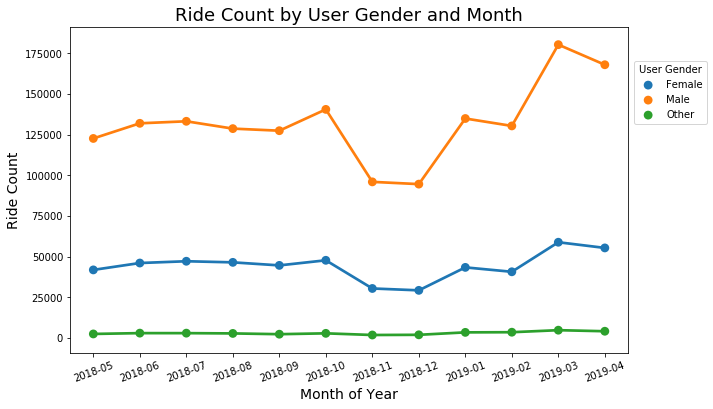

In [47]:
plt.figure(figsize=(10, 6))
#colors = {'Subscriber':base_color, 'Customer':alt_color}
ax = sb.pointplot(data=df_gender_count_month, x='start_time_year_month', y=0, hue='member_gender')
plt.title('Ride Count by User Gender and Month', fontsize=18)
plt.xlabel('Month of Year', fontsize=14)
plt.ylabel('Ride Count', fontsize=14)
plt.xticks(rotation=20)
ax.legend(loc='right', bbox_to_anchor=(1.15, 0.8), title='User Gender');

- The ride count trend for the male user group resembles that of overall trend
- The decline of rides by the female user group in cold months is not as significant as that of the male user group

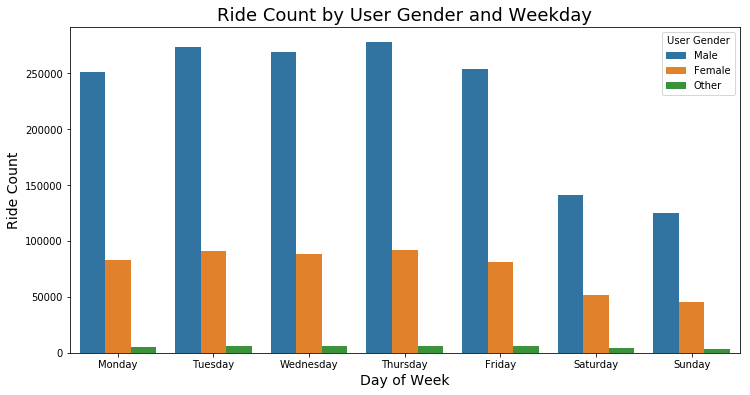

In [48]:
weekday_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
ax = sb.countplot(data=df_clean, x='start_time_weekday', hue='member_gender', order=weekday_index)
ax.legend(title='User Gender')
plt.title('Ride Count by User Gender and Weekday', fontsize=18)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Ride Count', fontsize=14);

- Both male and female user groups use the service more frequently during the week

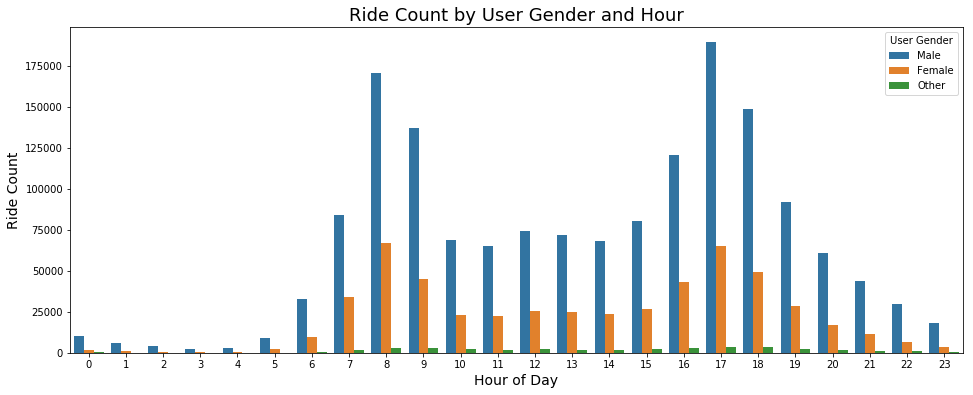

In [49]:
plt.figure(figsize=(16, 6))
ax = sb.countplot(data=df_clean, x='start_time_hour', hue='member_gender')
ax.legend(title='User Gender')
plt.title('Ride Count by User Gender and Hour', fontsize=18)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Ride Count', fontsize=14);

- 8-9 a.m. and 4-6 p.m. are peak hours for both male and female user groups

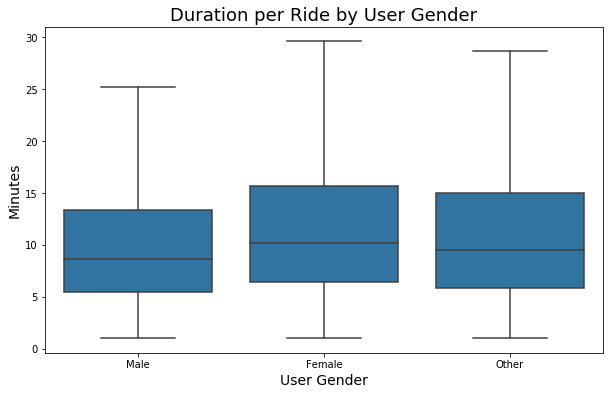

In [50]:
plt.figure(figsize=(10,6))
sb.boxplot(data=df_clean, x='member_gender', y='duration_min', color=base_color, showfliers=False)
plt.title('Duration per Ride by User Gender', fontsize=18)
plt.xlabel('User Gender', fontsize=14)
plt.ylabel('Minutes', fontsize=14);

- Overall duration per ride for the female user group is longer than their male counterparts

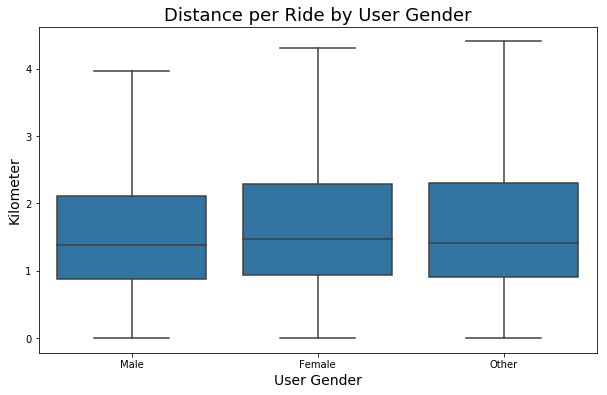

In [51]:
plt.figure(figsize=(10,6))
sb.boxplot(data=df_clean, x='member_gender', y='distance', color=base_color, showfliers=False)
plt.title('Distance per Ride by User Gender', fontsize=18)
plt.xlabel('User Gender', fontsize=14)
plt.ylabel('Kilometer', fontsize=14);

- Overall distance per ride for the female user group is slightly longer than their male counterparts

Summary
- Female users use the service less in cold months, but not as less as male users
- Overall duration per ride for the female user group is longer
- Overall distance per ride for the female user group is also slightly longer

#### Age Group ####

In [52]:
df_age_group_count_month = df_clean.groupby(['start_time_year_month', 'member_age_group']).size().reset_index()

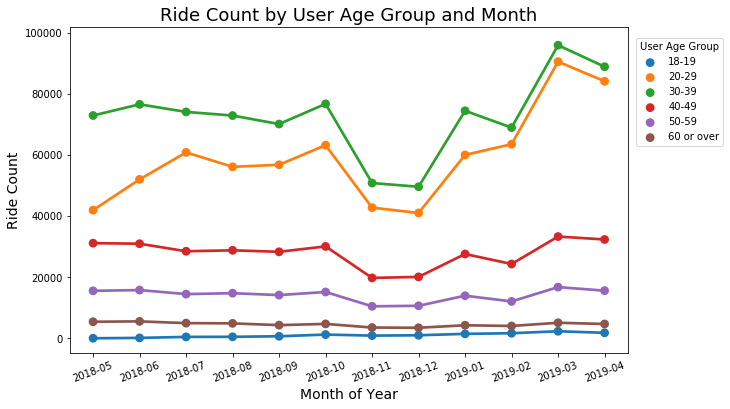

In [53]:
plt.figure(figsize=(10, 6))
ax = sb.pointplot(data=df_age_group_count_month, x='start_time_year_month', y=0, hue='member_age_group')
plt.title('Ride Count by User Age Group and Month', fontsize=18)
plt.xlabel('Month of Year', fontsize=14)
plt.ylabel('Ride Count', fontsize=14)
plt.xticks(rotation=20)
leg = ax.legend(loc='right', bbox_to_anchor=(1.18, 0.8), title='User Age Group')

- The '30-39' and '20-29' groups top the ride counts among all groups
- The '20-20' group is closing its gap with the '30-39' group

In [54]:
selected_age_group = ['20-29', '30-39', '40-49']
df_selected_age_group = df_clean[df_clean['member_age_group'].isin(selected_age_group)].reset_index()

- The top3 age groups are selected for further analysis

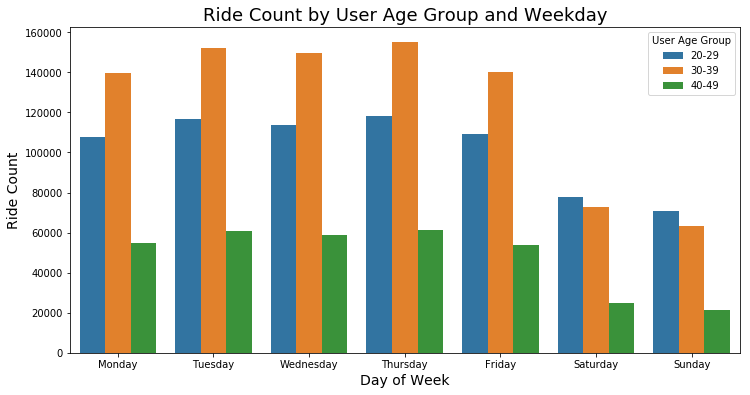

In [55]:
weekday_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
ax = sb.countplot(data=df_selected_age_group, x='start_time_weekday', hue='member_age_group', order=weekday_index, hue_order=selected_age_group)
ax.legend(title='User Age Group')
plt.title('Ride Count by User Age Group and Weekday', fontsize=18)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Ride Count', fontsize=14);

- The service is still used more during the week across the three groups
- '30-39' is the largest user group during the week
- However, the '20-29' group uses the service more than other groups on weekends

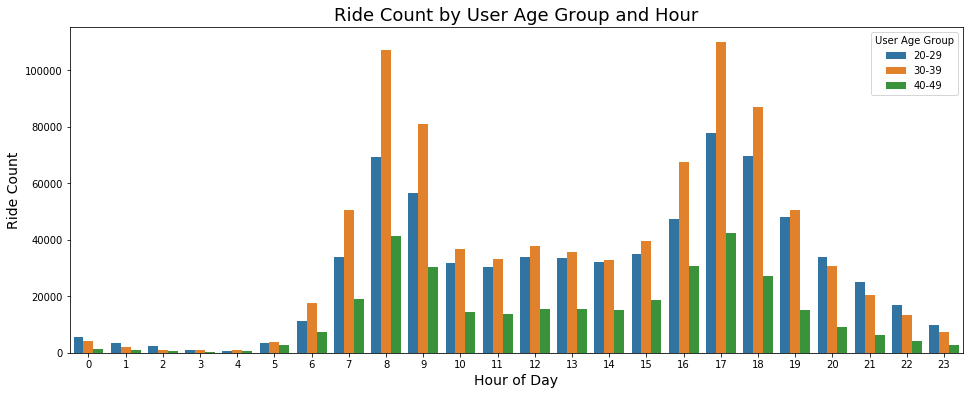

In [56]:
plt.figure(figsize=(16, 6))
ax = sb.countplot(data=df_selected_age_group, x='start_time_hour', hue='member_age_group', hue_order=selected_age_group)
ax.legend(title='User Age Group')
plt.title('Ride Count by User Age Group and Hour', fontsize=18)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Ride Count', fontsize=14);

- 8-9 a.m. and 5-6 p.m. are the peak hours across the three groups, which is the same as the overall trend
- The '20-29' group uses the service more than other groups from 8 p.m. to 2 a.m.

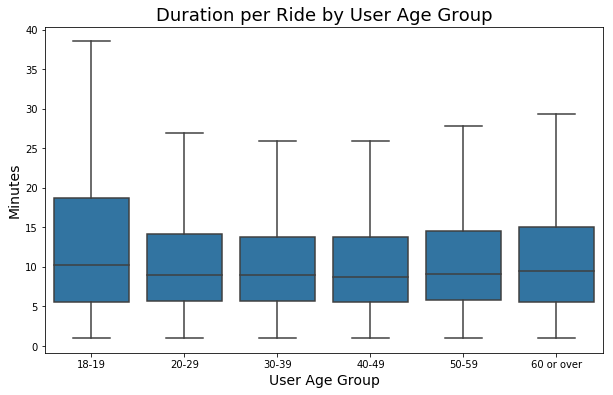

In [57]:
age_group = ['18-19', '20-29', '30-39', '40-49', '50-59', '60 or over']
plt.figure(figsize=(10,6))
sb.boxplot(data=df_clean, x='member_age_group', y='duration_min', color=base_color, order=age_group, showfliers=False)
plt.title('Duration per Ride by User Age Group', fontsize=18)
plt.xlabel('User Age Group', fontsize=14)
plt.ylabel('Minutes', fontsize=14);

- Both interquartile range box and whiskers for the '18-19' group are longer than other age groups
- Distribution of ride duration for '20-29', '30-39' and '40-49' groups is almost identical

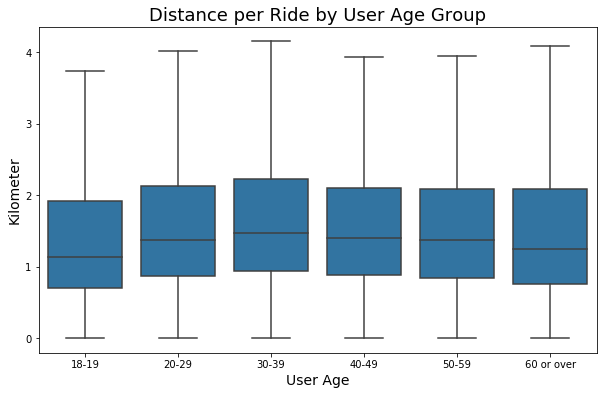

In [58]:
plt.figure(figsize=(10,6))
sb.boxplot(data=df_clean, x='member_age_group', y='distance', color=base_color, order=age_group, showfliers=False)
plt.title('Distance per Ride by User Age Group', fontsize=18)
plt.xlabel('User Age', fontsize=14)
plt.ylabel('Kilometer', fontsize=14);

- Overall ride distance for the '30-39' group is slightly longer than other groups

Summary
- '20-29', '30-39' and '40-49' are the top3 user groups, with the '30-39' group being the largest
- However, the '20-29' group is closing its gap with the '30-39' group
- While the '30-39' group is the largest during the week, the '20-29' group uses the service more than other groups on weekends
- While the '30-39' group is the largest during the day (6 a.m. to 7 p.m.), the '20-29' group uses the service more than other groups from 8 p.m. to 2 a.m.
- Compared to other groups, duration per ride for the '18-19' group is sparesely distributed
- Ride distance for the '30-39' group is slightly longer than other groups

#### User Type ####

In [59]:
df_user_type_count_month = df_clean.groupby(['start_time_year_month', 'user_type']).size().reset_index()

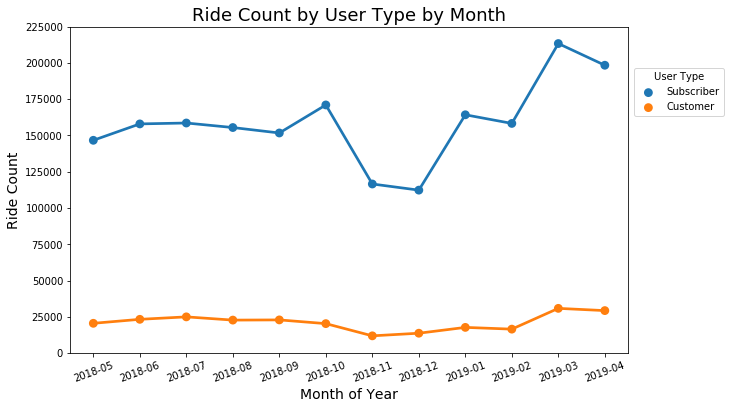

In [60]:
plt.figure(figsize=(10, 6))
user_type = ['Subscriber', 'Customer']
ax = sb.pointplot(data=df_user_type_count_month, x='start_time_year_month', y=0, hue='user_type', hue_order=user_type)
plt.title('Ride Count by User Type by Month', fontsize=18)
plt.xlabel('Month of Year', fontsize=14)
plt.ylabel('Ride Count', fontsize=14)
plt.xticks(rotation=20)
plt.ylim(0,)
ax.legend(loc='right', bbox_to_anchor=(1.18, 0.8), title='User Type');

- The subscriber group uses the service a lot more than the customer group

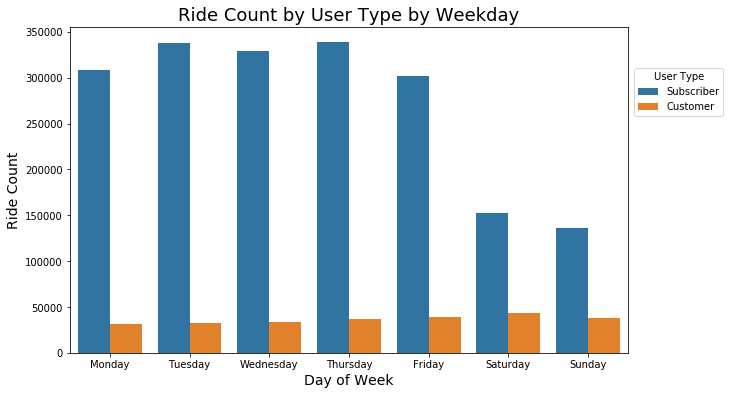

In [61]:
weekday_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
ax = sb.countplot(data=df_clean, x='start_time_weekday', hue='user_type', order=weekday_index, hue_order=user_type)
ax.legend(loc='right', bbox_to_anchor=(1.18, 0.8), title='User Type')
plt.title('Ride Count by User Type by Weekday', fontsize=18)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Ride Count', fontsize=14);

- The subscriber group uses the service more during the week
- The customer group uses the service more on Saturdays

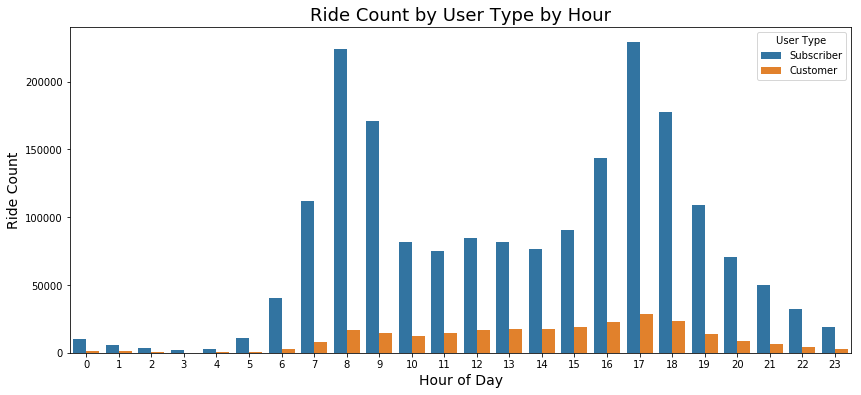

In [62]:
plt.figure(figsize=(14, 6))
ax = sb.countplot(data=df_clean, x='start_time_hour', hue='user_type', hue_order=user_type)
ax.legend(title='User Type')
plt.title('Ride Count by User Type by Hour', fontsize=18)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Ride Count', fontsize=14);

- 8-9 a.m. and 5-6 p.m. are the peak hours for the subscriber group
- The customer group's peak hours are from 4 p.m. and 6 p.m.

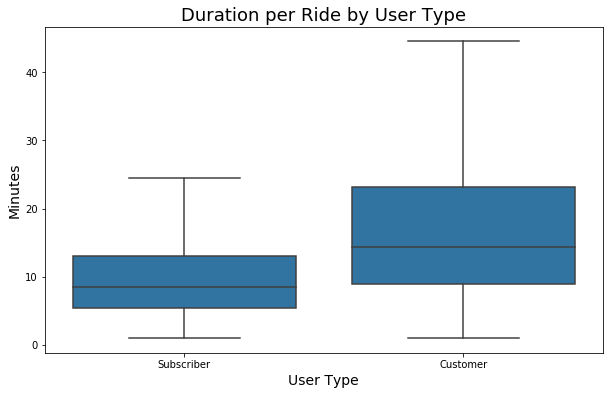

In [63]:
plt.figure(figsize=(10,6))
sb.boxplot(data=df_clean, x='user_type', y='duration_min', color=base_color, showfliers=False)
plt.title('Duration per Ride by User Type', fontsize=18)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Minutes', fontsize=14);

- Overall duration per ride for the customer group is longer than that of the subscriber group
- The duration per ride for the customer group is also more sparsely distributed

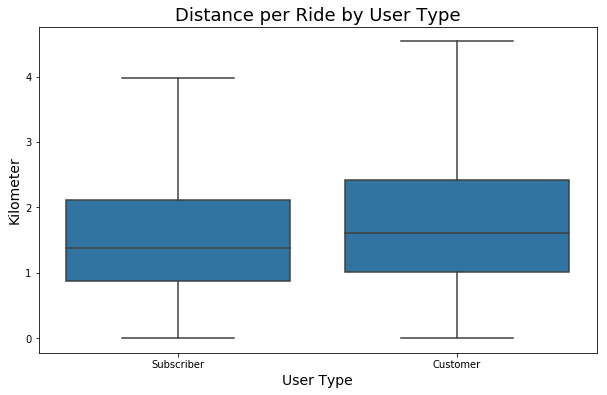

In [64]:
plt.figure(figsize=(10,6))
sb.boxplot(data=df_clean, x='user_type', y='distance', color=base_color, showfliers=False)
plt.title('Distance per Ride by User Type', fontsize=18)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Kilometer', fontsize=14);

- Distance per ride for the customer group is slightly longer than that of the subscriber group

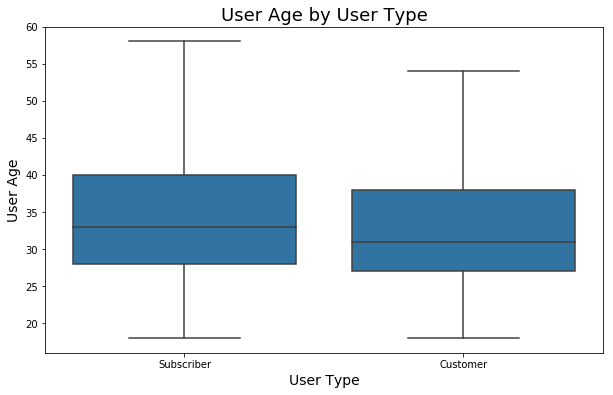

In [65]:
plt.figure(figsize=(10,6))
sb.boxplot(data=df_clean, x='user_type', y='member_age', color=base_color, showfliers=False)
plt.title('User Age by User Type', fontsize=18)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('User Age', fontsize=14);

- There seems to be a quite different user behavior between the subscriber and customer group. Therefore, I would like to know more about the profile of the customer group
- The customer group is younger than the subscriber group

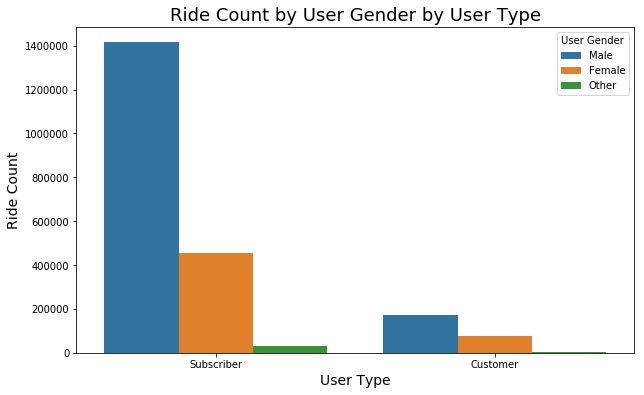

In [66]:
plt.figure(figsize=(10, 6))
ax = sb.countplot(data=df_clean, x='user_type', hue='member_gender')
ax.legend(title='User Gender')
plt.title('Ride Count by User Gender by User Type', fontsize=18)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Ride Count', fontsize=14);

- The proportion of female users in the customer group is slightly higher than the subscriber group

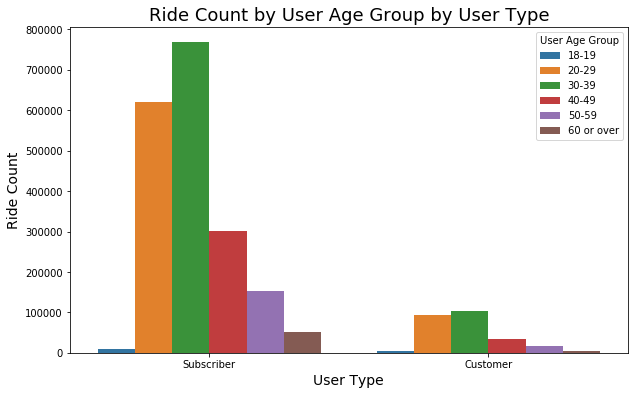

In [67]:
age_group = ['18-19', '20-29', '30-39', '40-49', '50-59', '60 or over']
plt.figure(figsize=(10, 6))
ax = sb.countplot(data=df_clean, x='user_type', hue='member_age_group', hue_order=age_group)
ax.legend(title='User Age Group')
plt.title('Ride Count by User Age Group by User Type', fontsize=18)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Ride Count', fontsize=14);

- The proportion of '20-29' group in the customer group is slightly more than the subscriber group

Summary
- The majority of the rides in the data is by the subscriber group, and the frequency is much higher than the customer group
- The two user type groups have different profile and user behavior:
    - The subscriber group uses the service more during the week while the customer group more on Saturdays
    - Both overall duration per ride and overall distance per ride for the customer group are longer than that of the subscriber group
    - The customer group is younger than the subscriber group. Specifically, the porportion of the '20-29' age group is slightly higher for the customer group
    - The proportion of female users in the customer group is slightly higher than the subscriber group

#### Month by Duration & Distance ####

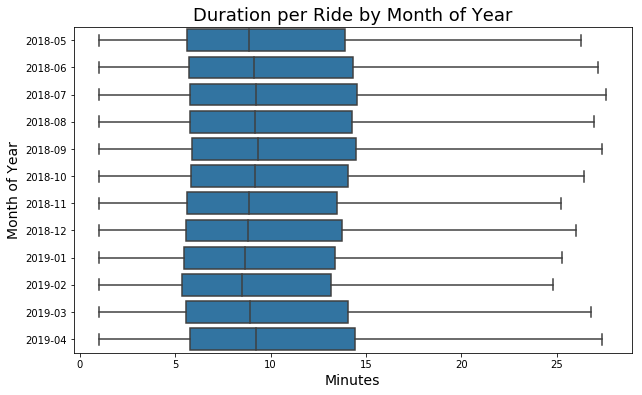

In [68]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_clean, x='duration_min', y='start_time_year_month', color=base_color, showfliers=False)
plt.title('Duration per Ride by Month of Year', fontsize=18)
plt.xlabel('Minutes', fontsize=14)
plt.ylabel('Month of Year', fontsize=14);

- Overall duration per ride is shorter in cold months (November 2018 - February 2019)

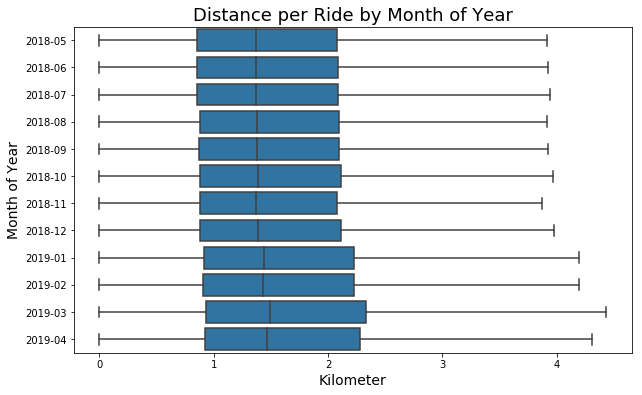

In [69]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_clean, x='distance', y='start_time_year_month', color=base_color, showfliers=False)
plt.title('Distance per Ride by Month of Year', fontsize=18)
plt.xlabel('Kilometer', fontsize=14)
plt.ylabel('Month of Year', fontsize=14);

- Overall distance per ride didn't drop in cold months
- However, there is a general increase in travel distance since January 2019

#### Weekday by Duration & Distance ####

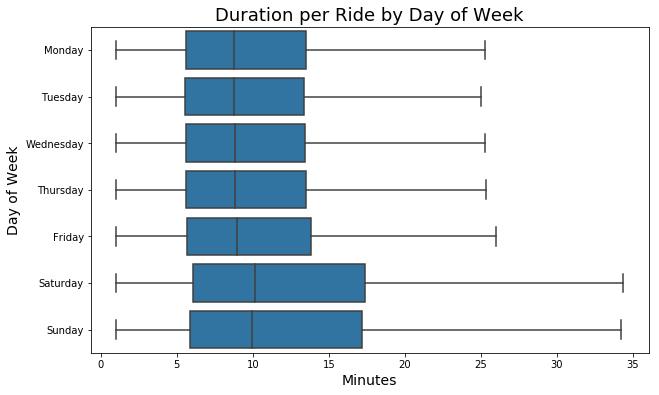

In [70]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_clean, x='duration_min', y='start_time_weekday', color=base_color, order=weekday_index, showfliers=False)
plt.title('Duration per Ride by Day of Week', fontsize=18)
plt.xlabel('Minutes', fontsize=14)
plt.ylabel('Day of Week', fontsize=14);

- Over duration per ride is longer on weekends and also more sparsely distributed

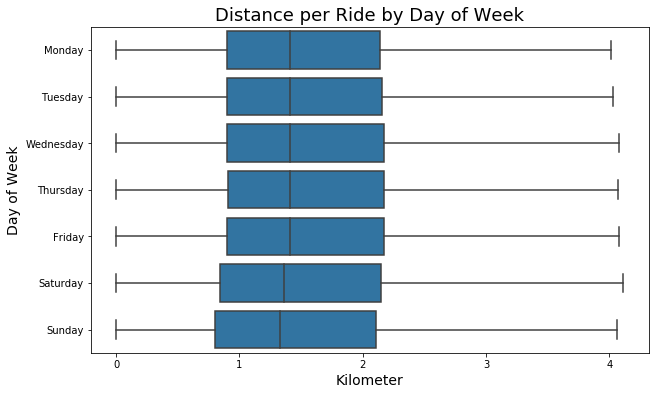

In [71]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=df_clean, x='distance', y='start_time_weekday', color=base_color, order=weekday_index, showfliers=False)
plt.title('Distance per Ride by Day of Week', fontsize=18)
plt.xlabel('Kilometer', fontsize=14)
plt.ylabel('Day of Week', fontsize=14);

- However, overall distance per ride is slightly shorter on weekends

Summary
- The overall duration per ride in cold months is shorter than other months, but no much difference in overall distance per ride
- There is a general increase in travel distance since January 2019
- The overall duration per ride is longer on weekends, but the distance is shorter

#### Duration by Distance ####

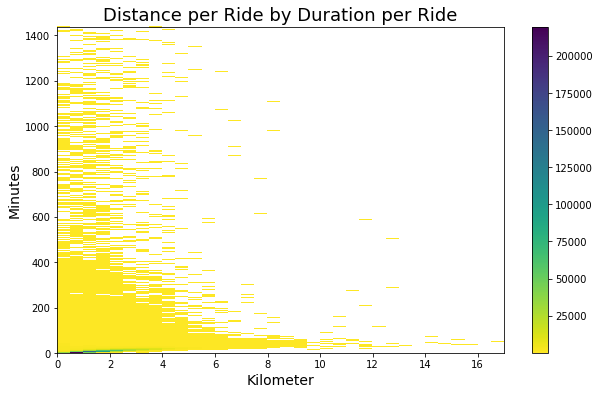

In [72]:
plt.figure(figsize=(10, 6))
bins_x = np.arange(0, df_clean['distance'].max()+0.5, 0.5)
bins_y = np.arange(1, df_clean['duration_min'].max()+2, 2)
plt.hist2d(data=df_clean, x='distance', y='duration_min', bins=[bins_x, bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.title('Distance per Ride by Duration per Ride', fontsize=18)
plt.xlabel('Kilometer', fontsize=14)
plt.ylabel('Minutes', fontsize=14);

- An overview of the dataset shows that most travel distance per ride is shorter than 4 kilometer and the duration lasts up to more than 1,400 minutes

In [73]:
df_min_dis = df_clean[(df_clean['distance'] <= 10) & (df_clean['duration_min'] <= 120)]

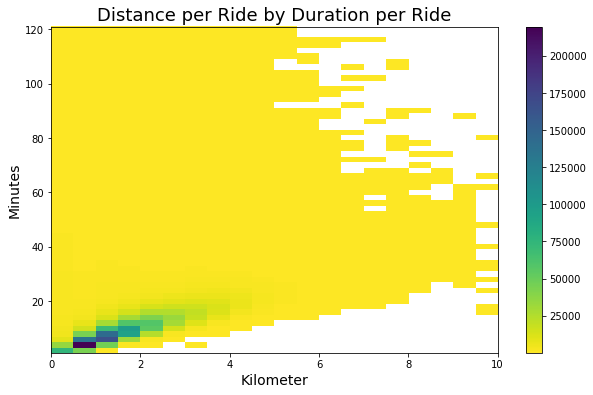

In [74]:
plt.figure(figsize=(10, 6))
bins_x = np.arange(0, df_min_dis['distance'].max()+0.5, 0.5)
bins_y = np.arange(1, df_min_dis['duration_min'].max()+2, 2)
plt.hist2d(data=df_min_dis, x='distance', y='duration_min', bins=[bins_x, bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.title('Distance per Ride by Duration per Ride', fontsize=18)
plt.xlabel('Kilometer', fontsize=14)
plt.ylabel('Minutes', fontsize=14);

- A closer look shows that the duration per ride is mostly within 20 minutes

In [75]:
df_min_dis_2 = df_clean[(df_clean['distance'] <= 4) & (df_clean['duration_min'] <= 20)]

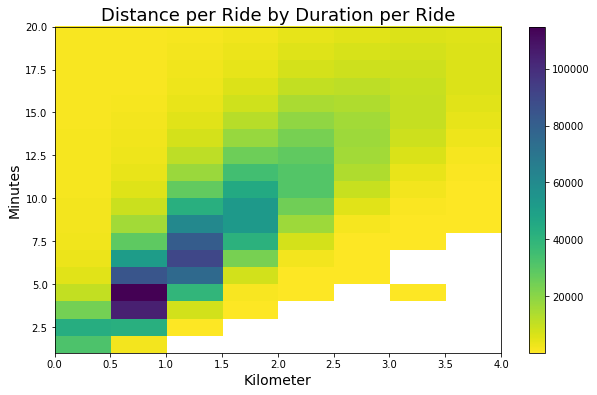

In [76]:
plt.figure(figsize=(10, 6))
bins_x = np.arange(0, df_min_dis_2['distance'].max()+0.5, 0.5)
bins_y = np.arange(1, df_min_dis_2['duration_min'].max()+1, 1)
plt.hist2d(data=df_min_dis_2, x='distance', y='duration_min', bins=[bins_x, bins_y], cmap='viridis_r', cmin=0.5)
plt.colorbar()
plt.title('Distance per Ride by Duration per Ride', fontsize=18)
plt.xlabel('Kilometer', fontsize=14)
plt.ylabel('Minutes', fontsize=14);

- A further closer look shows a linear correlation between distance and duration per ride
- The most frequent rides are about 0.5 to 1 kilometer in distance and 3 to 5 minutes in duration

Summary
- Most rides are within 4 kilometer in distance and 20 minutes in duration. There is a linear correlation between distance and duration per ride within this range
- The most frequent rides are about 0.5 to 1 kilometer in distance and 3 to 5 minutes in duration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

**Gender**
- Female users use the service less in cold months, but not as less as male users
- Overall duration per ride for the female user group is longer
- Overall distance per ride for the female user group is also slightly longer

**Age**
- '20-29', '30-39' and '40-49' are the top3 user groups, with the '30-39' group being the largest
- However, the '20-29' group is closing its gap with the '30-39' group
- While the '30-39' group is the largest during the week, the '20-29' group uses the service more than other groups on weekends
- While the '30-39' group is the largest during the day, the '20-29' group uses the service more than other groups from 8 p.m. to 2 a.m.
- Compared to other groups, duration per ride for the '18-19' group is sparesely distributed
- Ride distance for the '30-39' group is slightly longer than other groups

**User Type**
- The majority of the rides in the data is by the subscriber group, and the frequency is much higher than the customer group
- The two groups have different profile and user behavior:
    - The subscriber group uses the service more during the week while the customer group more on Saturdays
    - Both overall duration per ride and overall distance per ride for the customer group are longer than that of the subscriber group
    - The customer group is younger than the subscriber group. Specifically, the porportion of the '20-29' group is slightly higher for the customer group
    - The proportion of female users in the customer group is slightly higher than the subscriber group

**Time Variables by Duration and Distance**
- The overall duration per ride in cold months is shorter than other months, but no much difference in overall distance per ride
- There is a general increase in travel distance since January 2019
- The overall duration per ride is longer on weekends, but the distance is shorter

**Duration by Distance**
- Most rides are within 4 kilometer in distance and 20 minutes in duration. There is a positive linear correlation between distance and duration per ride within this range
- The most frequent rides are about 0.5 to 1 kilometer in distance and 3 to 5 minutes in duration

## Multivariate Exploration

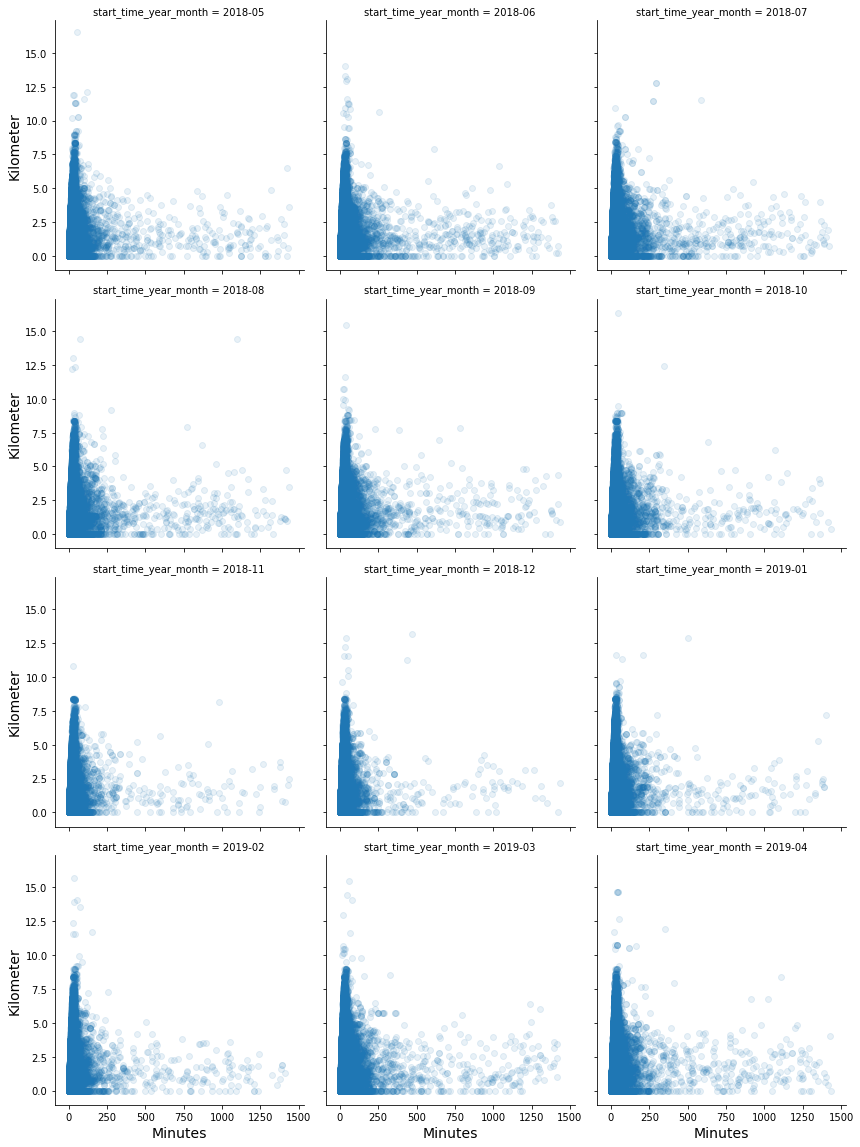

In [77]:
g = sb.FacetGrid(data=df_clean, col='start_time_year_month', col_wrap=3, size=4)
g.map(plt.scatter, 'duration_min', 'distance', alpha=0.1)
g.set_xlabels('Minutes', fontsize=14)
g.set_ylabels('Kilometer', fontsize=14);

- As observed previously, the duration per ride is shorter in cold months
- Distance per ride is increasing slightly over time

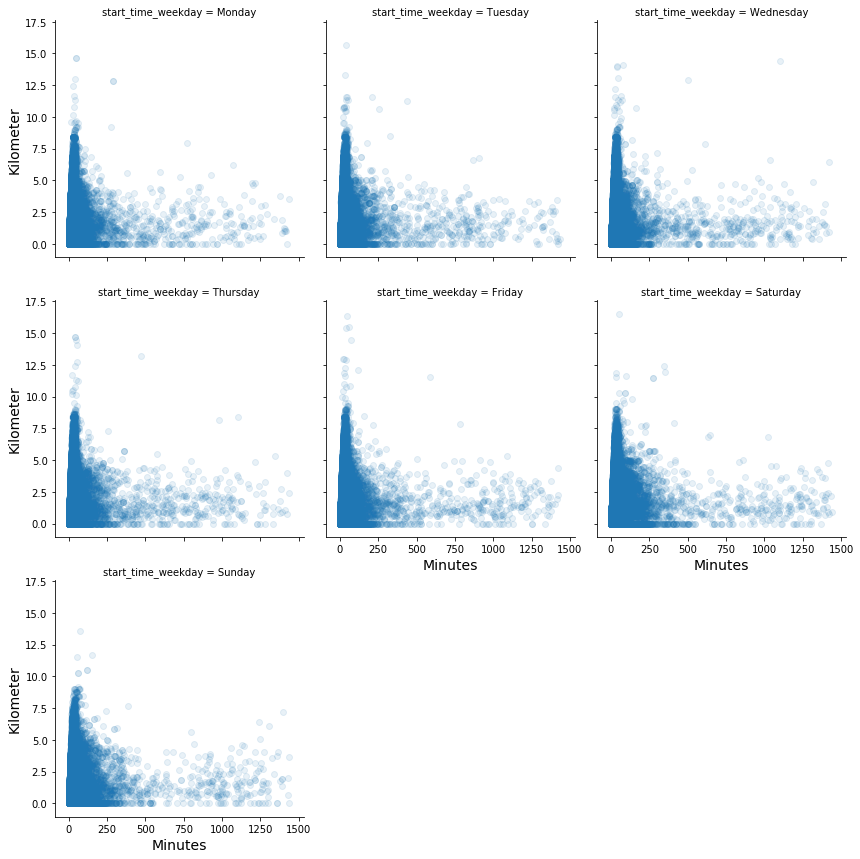

In [78]:
g = sb.FacetGrid(data=df_clean, col='start_time_weekday', col_order=weekday_index, col_wrap=3, size=4)
g.map(plt.scatter, 'duration_min', 'distance', alpha=0.1)
g.set_xlabels('Minutes', fontsize=14)
g.set_ylabels('Kilometer', fontsize=14);

- For the same distance travelled, the duration per ride is longer and the distribution wider on Saturday

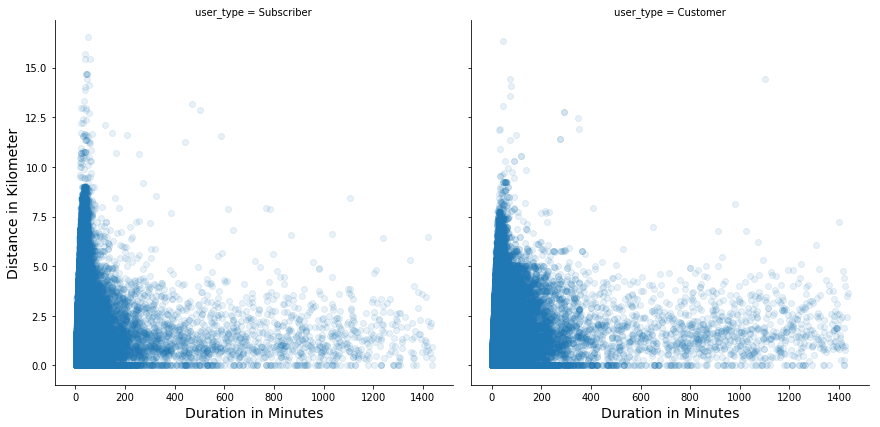

In [79]:
g = sb.FacetGrid(data=df_clean, col='user_type', col_wrap=3, size=6)
g.map(plt.scatter, 'duration_min', 'distance', alpha=0.1)
g.set_xlabels('Duration in Minutes', fontsize=14)
g.set_ylabels('Distance in Kilometer', fontsize=14);

- Even though the number of rides by the customer group in the data is substianlly fewer than the subscriber group, it is clear that the duration per ride for the customer group is significantly longer

In [80]:
warnings.filterwarnings("ignore")

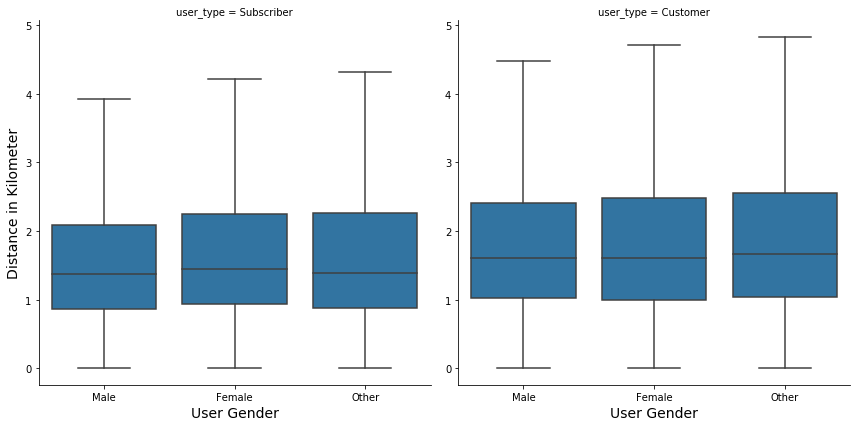

In [81]:
g = sb.FacetGrid(data=df_clean, col='user_type', size=6)
g.map(sb.boxplot, 'member_gender', 'distance', showfliers=False)
g.set_xlabels('User Gender', fontsize=14)
g.set_ylabels('Distance in Kilometer', fontsize=14);

- There is a slight increase in distance per ride across all gender groups in the customer group

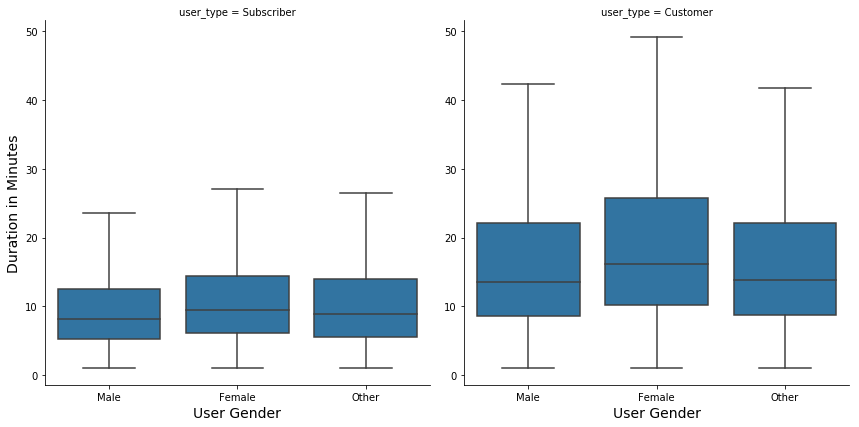

In [82]:
g = sb.FacetGrid(data=df_clean, col='user_type', size=6)
g.map(sb.boxplot, 'member_gender', 'duration_min', showfliers=False)
g.set_xlabels('User Gender', fontsize=14)
g.set_ylabels('Duration in Minutes', fontsize=14);

- Duration per ride is significantly longer for all gender groups in the customer group, especially the female user group
- The interquartile range box for the subscriber group is significantly smaller

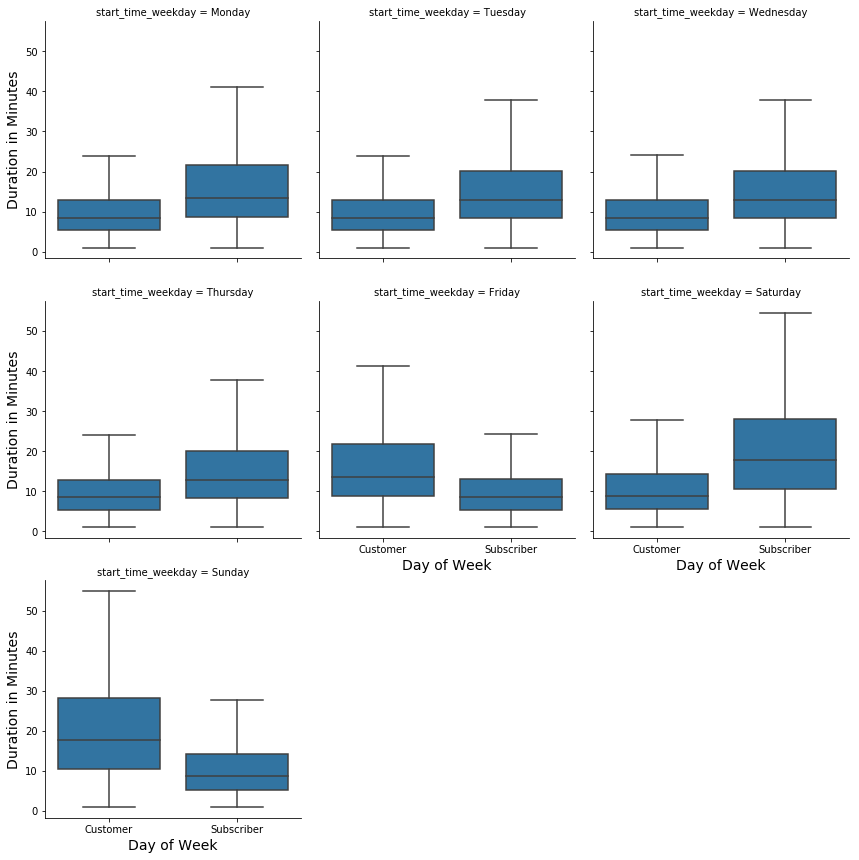

In [83]:
g = sb.FacetGrid(data=df_clean, col='start_time_weekday', col_order=weekday_index, col_wrap=3, size=4)
g.map(sb.boxplot, 'user_type', 'duration_min', showfliers=False)
g.set_xlabels('Day of Week', fontsize=14)
g.set_ylabels('Duration in Minutes', fontsize=14);

- While the overall duration per ride for the customer group is longer, it is only true for Friday and Sunday
- Distribution of duration per ride is identical from Monday to Thursday for both customer and subscriber group

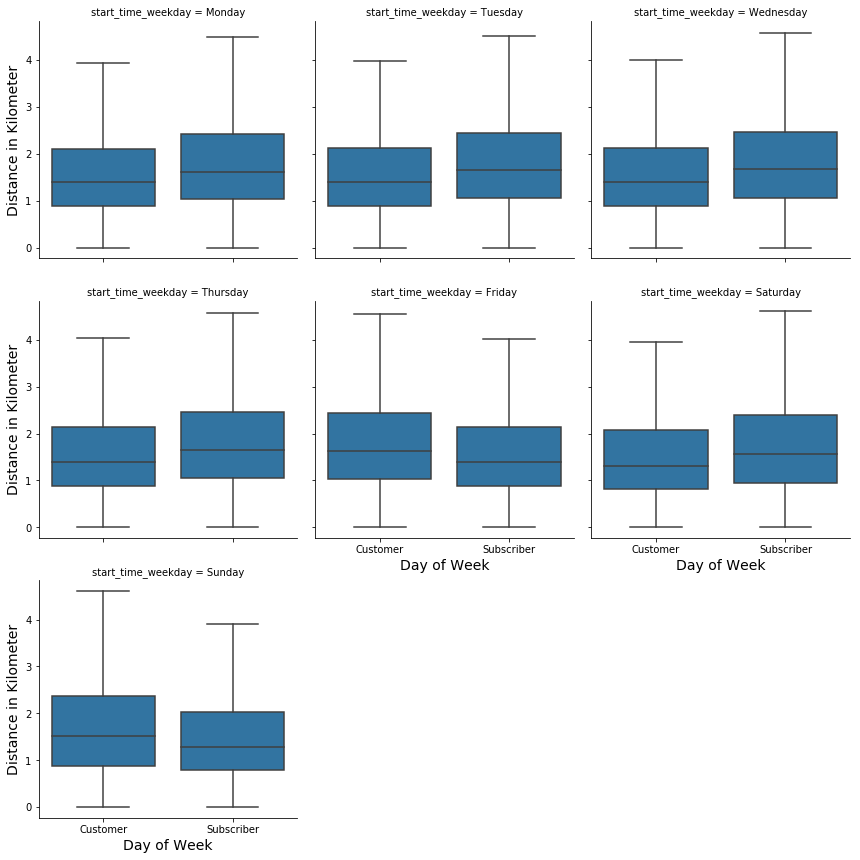

In [84]:
g = sb.FacetGrid(data=df_clean, col='start_time_weekday', col_order=weekday_index, col_wrap=3, size=4)
g.map(sb.boxplot, 'user_type', 'distance', showfliers=False)
g.set_xlabels('Day of Week', fontsize=14)
g.set_ylabels('Distance in Kilometer', fontsize=14);

- Similar pattern also found in distance: while the overall distance per ride for the customer group is longer, it is only true for Friday and Sunday
- Distribution of distance per ride is also identical from Monday to Thursday for both customer and subscriber group

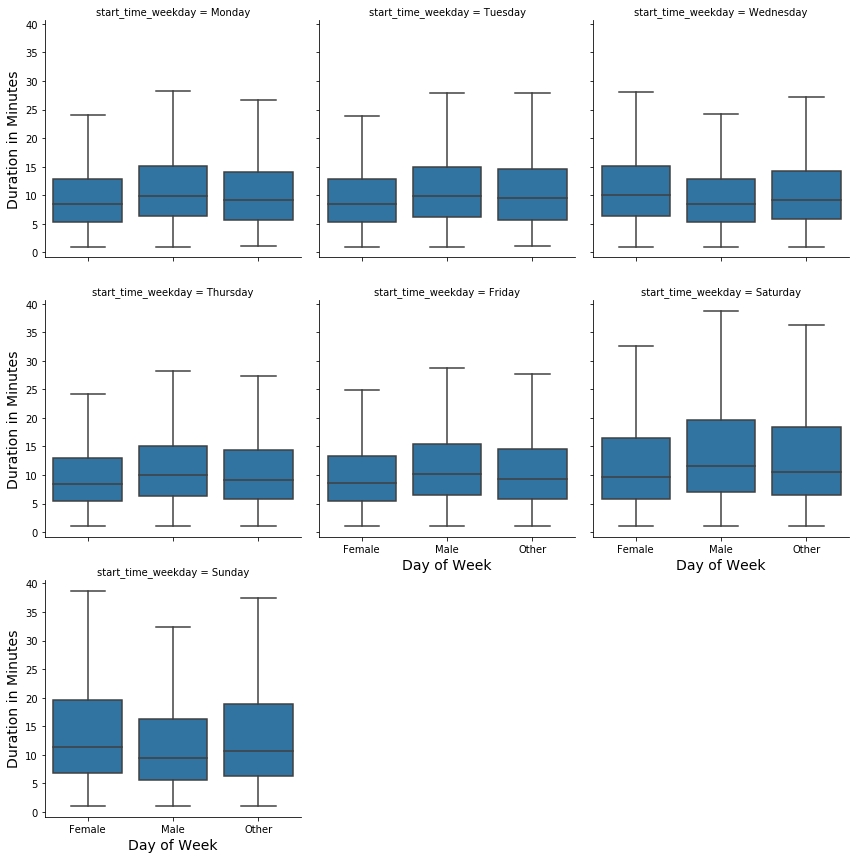

In [85]:
g = sb.FacetGrid(data=df_clean, col='start_time_weekday', col_order=weekday_index, col_wrap=3, size=4)
g.map(sb.boxplot, 'member_gender', 'duration_min', showfliers=False)
g.set_xlabels('Day of Week', fontsize=14)
g.set_ylabels('Duration in Minutes', fontsize=14);

- Although the overall duration per ride for the female user group is longer, no particular pattern is identified when the data are illustrated by day of week
- Interquartile range box and whiskers are both longer on weekends 

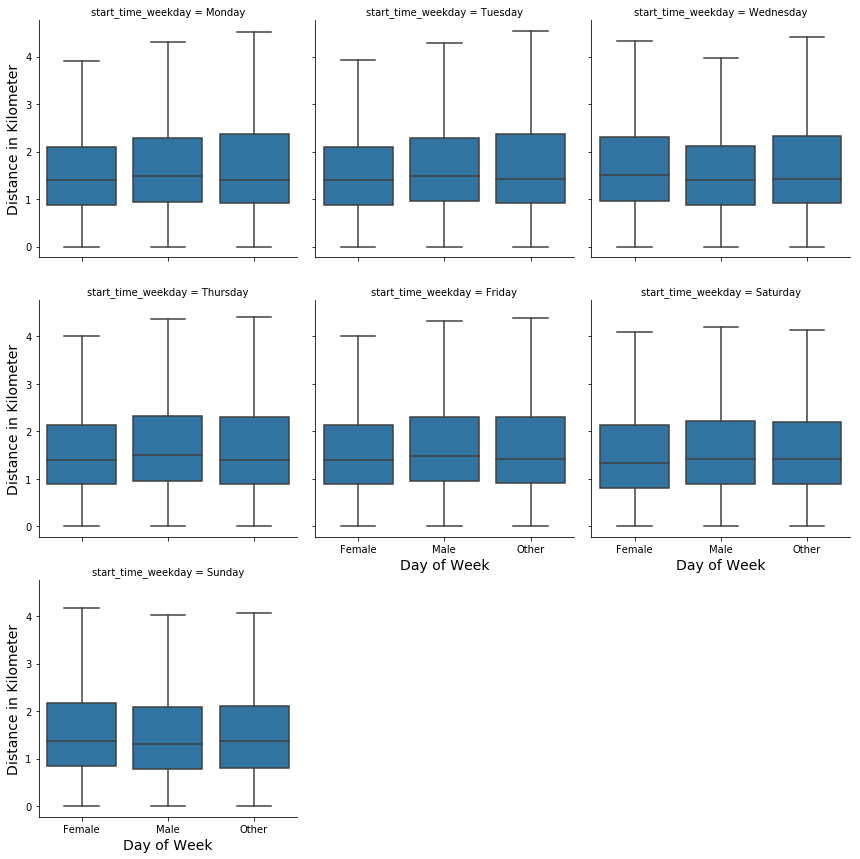

In [86]:
g = sb.FacetGrid(data=df_clean, col='start_time_weekday', col_order=weekday_index, col_wrap=3, size=4)
g.map(sb.boxplot, 'member_gender', 'distance', showfliers=False)
g.set_xlabels('Day of Week', fontsize=14)
g.set_ylabels('Distance in Kilometer', fontsize=14);

- No particular pattern of distance per ride found for all gender groups by days of week

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Multivariate exploration confirms the findings in previous analysis, and also provides additional information in some cases:

- As observed in the previous analysis, the duration per ride in cold months is shorter, but there is no much change to the distance per ride
- The scatterplot clearly shows that the duration per ride for the customer group is significantly longer and it is true across different user gender groups. Features of the customer group inclide:
    - Younger than the subscriber group, specifically the porportion of the '20-29' group is higher
    - The porportion of the female user group is also higher
- The distribution range of duration per ride for the subscriber group is significantly shorter


### Were there any interesting or surprising interactions between features?

- While the overall duration per ride for the customer group is longer than the subscriber, it is only true for Friday and Sunday
- Similar pattern also found in distance: while the overall distance per ride for the customer group is longer than the subscriber group, it is only true for Friday and Sunday
- Although the overall duration per ride for the female user group is longer, no particular pattern is identified when the data are illustrated by day of week